In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #nicer background
import ast
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CS4300 Team/books_data.csv')
df2 = pd.read_csv('/content/drive/My Drive/CS4300 Team/Books_rating.csv')

In [ ]:
#To plot books_data.csv dataset
genre_counts_dict = {}
for genres in df['categories']:
  if pd.isna(genres): #if there's Nan values, skip this as there will be errors
    continue
  genre_list = ast.literal_eval(genres) #convert the string to a list
  for genre in genre_list:
    if genre in genre_counts_dict:
      genre_counts_dict[genre] += 1
    else:
      genre_counts_dict[genre] = 1
genre_counts_dict = {genre: count for genre, count in genre_counts_dict.items() if count >= 100} #take only categories with over 100 books

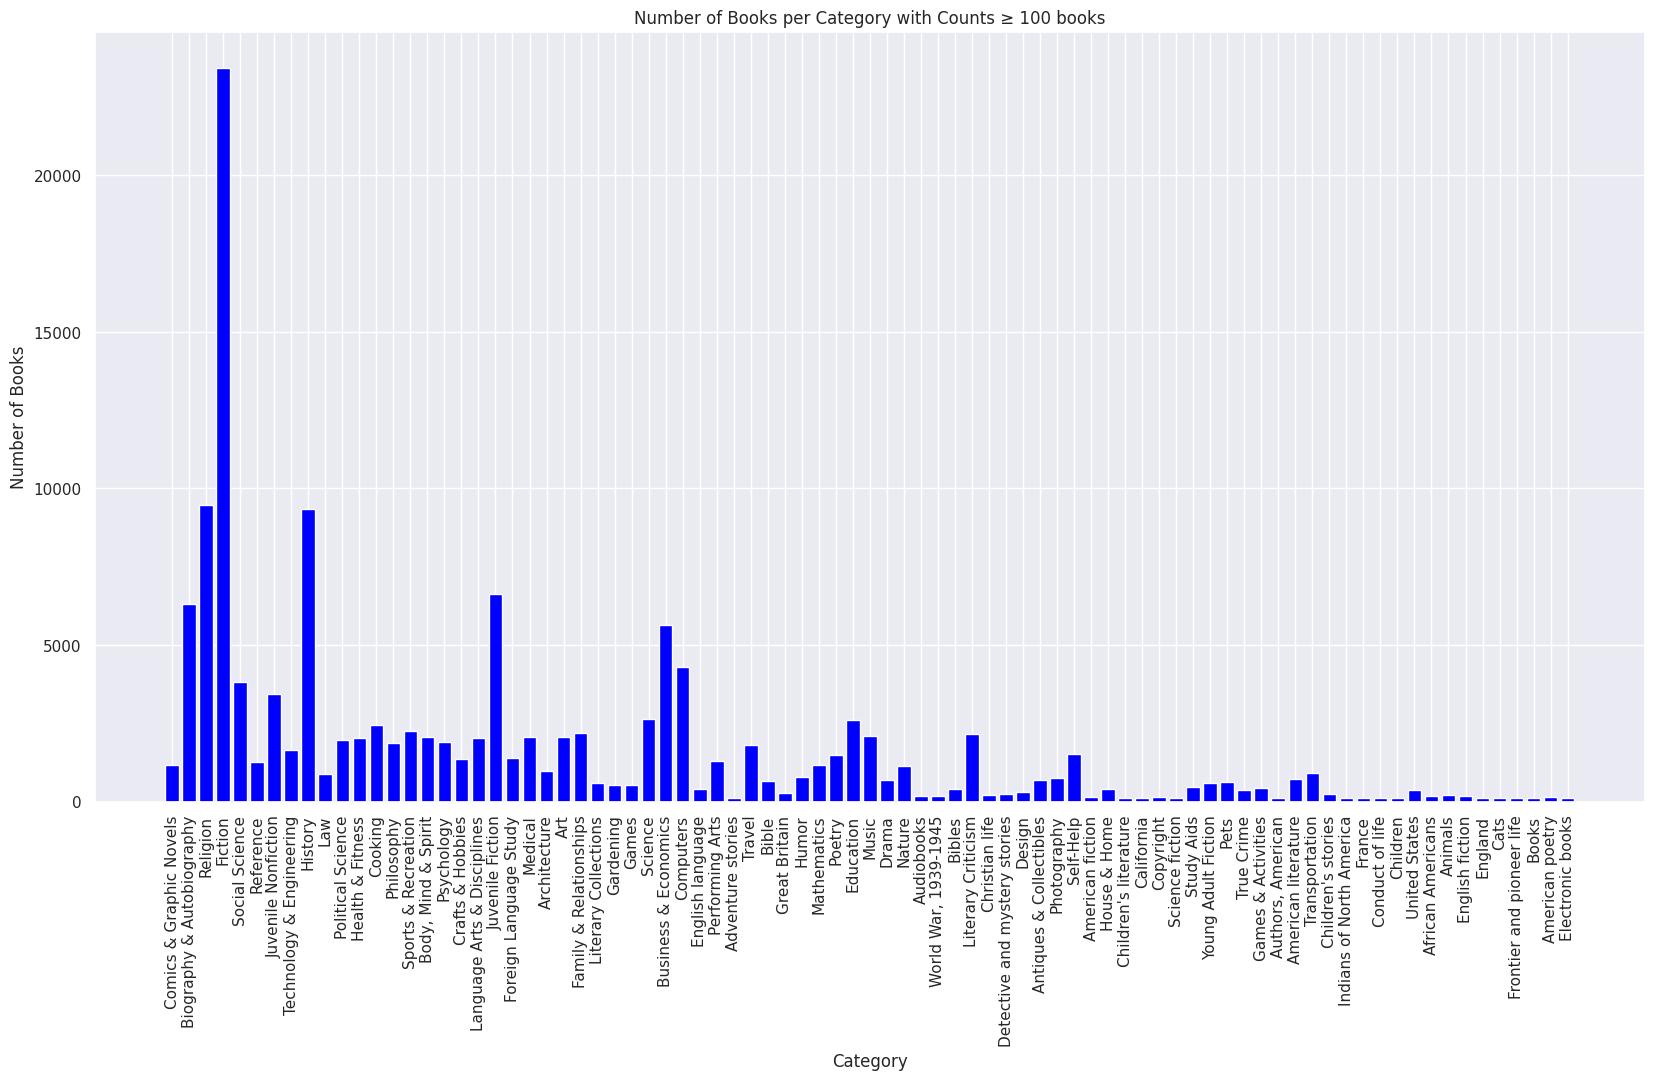

In [ ]:
genres = list(genre_counts_dict.keys())
counts = list(genre_counts_dict.values())

plt.figure(figsize=(20, 10))
plt.bar(genres, counts, color='blue')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.title('Number of Books per Category with Counts ≥ 100 books')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#for the Books_rating.csv dataset
mean_ratings = df2.groupby('Id')['review/score'].mean()
bins, labels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ['1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']
categories = pd.cut(mean_ratings, bins=bins, include_lowest=True, right=False, labels=labels)
rating_counts = categories.value_counts().sort_index()

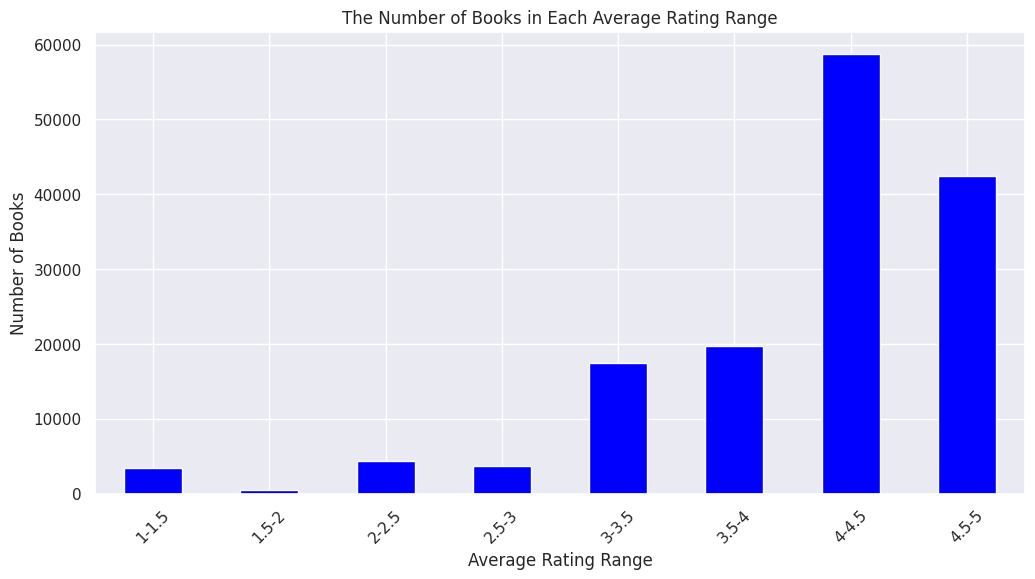

In [ ]:
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='blue')

plt.title('The Number of Books in Each Average Rating Range')
plt.xlabel('Average Rating Range')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()